# Functions to load and clean the data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option("display.max_rows", 30)

link_pop = "https://www.unfpa.org/data/world-population-dashboard"

# function to change values
def change_value(df, clmn, old, new):
  df[clmn].replace(old, new, inplace=True)

# function to load the csv without any unnecessary columns
def get_data():
  df = pd.read_csv("https://raw.githubusercontent.com/BRT33/Assignment---Shark-attack/main/attacks.csv",
                     encoding='ISO-8859-1').drop(['Case Number','Date', 'Year', 'Country', 'Area', 'Location', 'Name',
                                                  'Sex ', 'Injury', 'Time', 'Investigator or Source', 'pdf',
                                                  'href formula', 'href','Case Number.1', 'Case Number.2',
                                                  'original order', 'Unnamed: 22','Unnamed: 23'], axis=1)
  df.rename({'Fatal (Y/N)':'Fatal', 'Species ': 'Species'}, axis=1, inplace=True)
  return df

# function to transform non-standard NAN values, typos and double values and then drop all NAN values
def clean_type(df):
# Type
  change_value(df,'Type','Questionable','Provoked')
  change_value(df,'Type','Invalid', np.nan)
  change_value(df,'Type','Boat', 'Boating')
  change_value(df,'Type','Boatomg', 'Boating')
  df.dropna(inplace=True)
  return df

def clean_activity(df):
  # Activity
  change_value(df,'Activity','Questionable',np.nan)
  df.dropna(inplace=True)
  return df

def clean_age(df):
  change_value(df, 'Age', '\"young\"', np.nan)
  change_value(df, 'Age', '13 or 14', 14)
  change_value(df, 'Age', '13 or 18', np.nan)
  change_value(df, 'Age', '17 & 16', 17)
  change_value(df, 'Age', '17 & 35', 17)
  change_value(df, 'Age', '18 months', 1)
  change_value(df, 'Age', '18 or 20', 18)
  change_value(df, 'Age', '20', 20)
  change_value(df, 'Age', '21 & ?', 21)
  change_value(df, 'Age', '30 or 36', 30)
  change_value(df, 'Age', ' 30', 30)
  change_value(df, 'Age', ' 28', 28)
  change_value(df, 'Age', ' 43', 43)
  change_value(df, 'Age', ' ', np.nan)
  change_value(df, 'Age', 'teen', np.nan)
  change_value(df, 'Age', 'adult', 18)
  change_value(df, 'Age', 'Teen', np.nan)
  change_value(df, 'Age', 'Both 11', 11)
  change_value(df, 'Age', 'MAKE LINE GREEN', np.nan)
  change_value(df, 'Age', '', np.nan)
  change_value(df, 'Age', '>50', 50)
  change_value(df, 'Age', '9 months', 1)
  change_value(df, 'Age', '9 or 10', 10)
  change_value(df, 'Age', '9 & 12', 12)
  change_value(df, 'Age', '30 & 32', np.nan)
  change_value(df, 'Age', '28 & 26', 26)
  change_value(df, 'Age', '40s', 40)
  change_value(df, 'Age', '60s', np.nan)
  change_value(df, 'Age', '20s', 20)
  change_value(df, 'Age', '30s', 30)
  change_value(df, 'Age', '46 & 34', 46)
  change_value(df, 'Age', '36 & 26', 30)
  change_value(df, 'Age', '\xa0 ', np.nan)
  change_value(df, 'Age', '6½', 6)
  change_value(df, 'Age', '20?', 20)
  change_value(df, 'Age', '60\'s', np.nan)
  change_value(df, 'Age', '32 & 30', 30)
  change_value(df, 'Age', '25 to 35', 25)
  change_value(df, 'Age', '23 & 26', 25)
  change_value(df, 'Age', '50 & 30', 35) 
  change_value(df, 'Age', '33 & 37', 35)
  change_value(df, 'Age', '7 or 8', 7)
  df.dropna(inplace=True)
  df['Age'] = df['Age'].astype(int)
  return df

def clean_fatal(df):
  change_value(df,'Fatal','UNKNOWN', np.nan)
  change_value(df,'Fatal','y', 'Y')
  change_value(df,'Fatal',' N', 'N')
  change_value(df,'Fatal','m', np.nan)
  change_value(df,'Fatal','M', np.nan)
  change_value(df,'Fatal','2017', np.nan)
  change_value(df,'Fatal','N ', 'N')
  change_value(df,'Fatal','Y', True)
  change_value(df,'Fatal','N', False)
  df.dropna(inplace=True)
  return df

def clean_species(df):
  change_value(df,'Species','Invalid', np.nan)
  change_value(df,'Species','Shark involvement not confirmed', np.nan)
  change_value(df,'Species','Shark involvement prior to death was not confirmed', np.nan)
  change_value(df,'Species','Shark involvement prior to death unconfirmed', np.nan)
  change_value(df,'Species','Questionable', np.nan)
  df.dropna(inplace=True)
  return df

# function to look at value frequencies in all columns
def find_freq(df):
  for clm in df.columns:
    print(f'{clm}:')
    print(f'{df[clm].value_counts()}\n')

# function to find the total of missing values per column
def find_miss(df):
  for clm in df.columns:
    df.loc[:,clm].isnull()
    print(df[clm].isnull().sum())

# function to create a extra column with the frequency
# of the values of the primary column
def add_freq_count(df, clmn):
  df.loc[:,f'freq_count_{clmn}'] = df.groupby(clmn)[clmn].transform('count')

# Questions



Vraag 1: What are the most dangerous types of sharks to humans?

Bij het sorteren van de data is er gekozen alleen naar de top 3 van frequent aanvallende haaien te kijken.
Deze drie vormen samen het overgrote merendeel van alle aanvallen.

Bij het opschonen zijn alle waardes met een frequentie van onder de 40 laten vallen.
Deze laagfrequente groep bevat zowel a-typische classificaties(bijv.:"4m Shark",
'small white shark') alswel de groepen haaien die minder vaak geidentificeerd worden of helemaal niet geidentificeerd zijn.

Alhoewel er dus een bias ontstaat naar de meest frequent geidentificeerde haaien,
zijn dit de meest voorkomende soorten die mensen aan vallen en dus de groep waar we naar willen kijken.
Naar het percentage dodelijke aanvallen kijken kan vertekenend zijn en is dus niet gedaan,
bijv.: een soort met een enkele dodelijke aanval zal dan als 100% dodelijk gezien worden.
Dit is niet wat een soort gevaarlijk maakt. Dat heeft met meer factoren te maken,
en dus kijken we naa

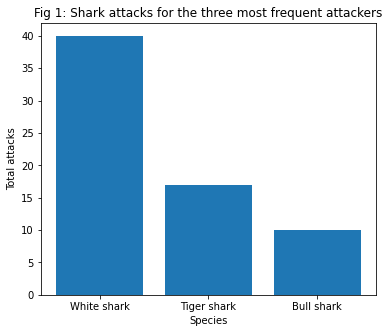

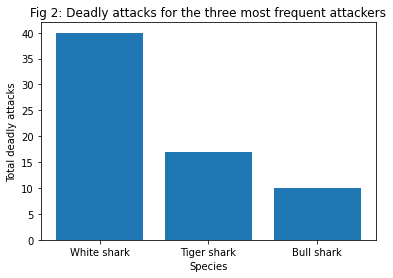

Vraag 2: Are children more likely to be attacked?

De Dataset is zo compleet mogelijk gehouden, NaN waardes laaten vallen en zoveel mogelijk
waardes hersteld. Er waren enkele dubbele waardes bij(bijv. '17 & 18'), deze zijn alleen laten vallen als deze leeftijden 1 kind en 1 volwasssene bevatten.
Verder zijn deze dubbele waardes als 1 aanval gerekend, omdat het niet duidelijk is of er twee gewonden zijn of twee betrokkenen.

Voor de vraag "Worden kinderen vaker aangevallen door haaien."
moeten we vast stellen wat precies "kinderen" zijn, en wat is "vaker"?
Volgens data van de Verenigde Naties(https://www.unfpa.org/data/world-population-dashboard)
is 25% van de bevolking een kind, 10% is senior, en 65% is volwassen.
Deze verdeling houden wij hier dan ook aan als de grens tussen kind en volwassenen,
aangezien vanaf de leeftijd van 15 jaar er meer "volwassen" activiteiten ondernomen worden(denk aan body-boarden of ver zwemmen zonder begelijding)

Uit deze gegevens volgt dat 11.61% van de a

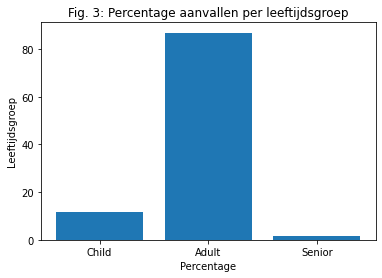

Vraag 3: Are provoked sharks more or less dangerous?

Om deze vraag te beantwoorden kijken we naar het percentage van dodelijke aanvallen.
We kijken alleen naar naar de groepen die explixiet een vermelding hebben als "Provoked" of "Unprovoked",
de groep aanvallen op boten zullen wij niet bekijken, het is gokken wat er gebeurde op de boot en dus niet te bepalen of er sprake van uitlokking was.

Als we naar de data kijken is het vrij duidelijk dat niet uitgelokte aanvallen dodelijker zijn, en dus volgens onze criteria "gevaarlijker".
Een mogelijke verklaring is het "element van verrassing" wat bij een onuitgelokt incident aanwezig is,
iemand is mogelijk overrompeld door en onvoorbereid op een aanval als hij deze niet van plan was uit te lokken.




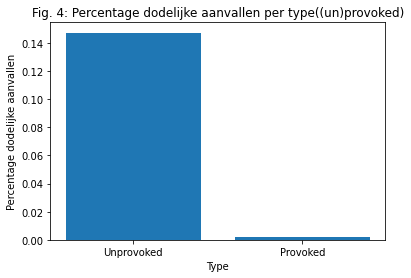

Vraag 4: Are certain activities more likely to result in a shark attack?

Voor het beantwoorden van deze vraag kijken we naar de meest voorkomende activiteiten tijdens aanvallen
en zullen we deze vergelijken met data uit 2014 van www.statista.com https://www.statista.com/statistics/312915/most-popular-beach-vacation-activities-worldwide/.
Deze data laat zien welke activiteiten mensen het meest doorgeven die zij op het strand uitvoeren.

Als we kijken naar onze eigen data zien we dat de top 3 activiteiten om gebeten te worden zijn:
1: surfen
2: zwemmen
3: speervissen

De enige activiteit die in de data van statista voorkomt is "zwemmen", Het lijkt er dus op dat de activiteiten surfen en speervissen wel degelijk
meer kans leveren aangevallen te worden


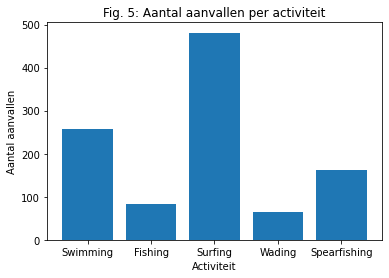

In [11]:
# *********************************************** VRAAG 1 ***************************************************
print('Vraag 1: What are the most dangerous types of sharks to humans?\n\n\
Bij het sorteren van de data is er gekozen alleen naar de top 3 van frequent aanvallende haaien te kijken.\n\
Deze drie vormen samen het overgrote merendeel van alle aanvallen.\n\n\
Bij het opschonen zijn alle waardes met een frequentie van onder de 40 laten vallen.\n\
Deze laagfrequente groep bevat zowel a-typische classificaties(bijv.:\"4m Shark\",\n\
\'small white shark\') alswel de groepen haaien die minder vaak geidentificeerd worden of helemaal niet geidentificeerd zijn.\n\n\
Alhoewel er dus een bias ontstaat naar de meest frequent geidentificeerde haaien,\n\
zijn dit de meest voorkomende soorten die mensen aan vallen en dus de groep waar we naar willen kijken.\n\
Naar het percentage dodelijke aanvallen kijken kan vertekenend zijn en is dus niet gedaan,\n\
bijv.: een soort met een enkele dodelijke aanval zal dan als 100% dodelijk gezien worden.\n\
Dit is niet wat een soort gevaarlijk maakt. Dat heeft met meer factoren te maken,\n\
en dus kijken we naar de totale aanvallen en de totale dodelijke aanvallen.\n\n\
Hieronder is te zien dat bij zowel fig 1.(totale aanvallen),\n\
als bij fig 2.(totale dodelijke aanvallen),de witte haai het hoogst scored.\n\
Als we naar deze waardes kijken \"wint\" de witte haai(\"White shark\"),\n\
dit lijkt de meest gevaarlijke haaiensoort te zijn.\n\n')

df = get_data()
df = clean_species(df)
df = clean_fatal(df)

add_freq_count(df,'Species')
freq_mask_speci = df.loc[:,'freq_count_Species'] > 36

df = df.loc[freq_mask_speci]
w_shark_mask = df.loc[:,'Species'] == 'White shark'
t_shark_mask = df.loc[:,'Species'] == 'Tiger shark'
b_shark_mask = df.loc[:,'Species'] == 'Bull shark'
deadly_mask = df.loc[:,'Fatal'] == True


deadly_w_attacks = df[w_shark_mask & deadly_mask].loc[:,'Fatal'].sum()
deadly_t_attacks = df[t_shark_mask & deadly_mask].loc[:,'Fatal'].sum()
deadly_b_attacks = df[b_shark_mask & deadly_mask].loc[:,'Fatal'].sum()


data= [deadly_w_attacks, deadly_t_attacks, deadly_b_attacks]
sharks = ['White shark', 'Tiger shark', 'Bull shark']
df_deadly = pd.DataFrame(data)
df_deadly.columns = ['Deadly attacks']
df_deadly['Species'] = sharks

fig, ax = plt.subplots()


x = df['Species']
y = df['freq_count_Species']

plt.xlabel('Species')
plt.ylabel('Total attacks')
plt.title('Fig 1: Shark attacks for the three most frequent attackers')
fig.set_size_inches(6, 5)


fig, ax2 = plt.subplots()

x = df_deadly['Species']
y = df_deadly['Deadly attacks']

plt.xlabel('Species')
plt.ylabel('Total deadly attacks')
plt.title('Fig 2: Deadly attacks for the three most frequent attackers')
plt.show(ax.bar(x,y), ax2.bar(x,y))

fig.set_size_inches(6, 5)


# *********************************************** VRAAG 2 ***************************************************
df = get_data()
df = clean_age(df)

child_mask = df.loc[:, 'Age'] <= 14
senior_mask = df.loc[:, 'Age'] >= 65

total = len(df.index)
senior = round((len(df[senior_mask].index)/total)*100, 2)
adult = round((len(df[~child_mask & ~senior_mask].index)/total)*100, 2)
child = round((len(df[child_mask].index)/total)*100, 2)

print(f'Vraag 2: Are children more likely to be attacked?\n\n\
De Dataset is zo compleet mogelijk gehouden, NaN waardes laaten vallen en zoveel mogelijk\n\
waardes hersteld. Er waren enkele dubbele waardes bij(bijv. \'17 & 18\'), deze zijn alleen laten vallen als deze leeftijden 1 kind en 1 volwasssene bevatten.\n\
Verder zijn deze dubbele waardes als 1 aanval gerekend, omdat het niet duidelijk is of er twee gewonden zijn of twee betrokkenen.\n\n\
Voor de vraag \"Worden kinderen vaker aangevallen door haaien.\"\n\
moeten we vast stellen wat precies \"kinderen\" zijn, en wat is \"vaker\"?\n\
Volgens data van de Verenigde Naties({link_pop})\n\
is 25% van de bevolking een kind, 10% is senior, en 65% is volwassen.\n\
Deze verdeling houden wij hier dan ook aan als de grens tussen kind en volwassenen,\n\
aangezien vanaf de leeftijd van 15 jaar er meer "volwassen" activiteiten ondernomen worden(denk aan body-boarden of ver zwemmen zonder begelijding)\n\n\
Uit deze gegevens volgt dat {child}% van de aanvallen tegen kinderen zijn.\n\
Slechts {senior}% van de aanvallen waren tegen senioren.\n\
En {adult}% waren volwassenen die aangevallen zijn\n\n\
Vergeleken met de wereldbevolking lijken kinderen dus niet waarschijnlijker te zijn om aan gevallen te worden.\n\
Vergeleken met senioren worden kinderen wel vaker aangevallen, dit is natuurlijk logisch senioren zullen als groep gemiddeld vaker op, of dichtbij,\n\
het strand blijven en zullen minder vaak activiteiten als body-boarden of surfen doen.\n\n')

fig, ax3 = plt.subplots()

data = [[child, 'Child'],[adult, 'Adult'],[senior, 'Senior']]
df_age = pd.DataFrame(data, columns=['Percentage of attacks', 'Age'])
x = df_age.loc[:,'Age']
y = df_age.loc[:,'Percentage of attacks']

plt.xlabel('Percentage')
plt.ylabel('Leeftijdsgroep')
plt.title('Fig. 3: Percentage aanvallen per leeftijdsgroep')
plt.show(ax3.bar(x,y))

fig.set_size_inches(6, 5)

# *********************************************** VRAAG 3 ***************************************************
df = get_data()
df = clean_type(df)
df = clean_fatal(df)

provoke_mask = df.loc[:, 'Type'] == 'Provoked'
unprovoke_mask = df.loc[:, 'Type'] == 'Unprovoked'
deadly_mask = df.loc[:,'Fatal'] == True

deadly_prov = df[deadly_mask & provoke_mask]
deadly_unprov = df[deadly_mask & unprovoke_mask]

prov = (len(deadly_prov.index) / len(df.index))
unprov = (len(deadly_unprov.index) / len(df.index))

data = [[ unprov, 'Unprovoked'],[prov,'Provoked']]
df_prov = pd.DataFrame(data, columns=['Percentage lethal', 'Type'])

print('Vraag 3: Are provoked sharks more or less dangerous?\n\n\
Om deze vraag te beantwoorden kijken we naar het percentage van dodelijke aanvallen.\n\
We kijken alleen naar naar de groepen die explixiet een vermelding hebben als "Provoked" of "Unprovoked",\n\
de groep aanvallen op boten zullen wij niet bekijken, het is gokken wat er gebeurde op de boot en dus niet te bepalen of er sprake van uitlokking was.\n\n\
Als we naar de data kijken is het vrij duidelijk dat niet uitgelokte aanvallen dodelijker zijn, en dus volgens onze criteria "gevaarlijker".\n\
Een mogelijke verklaring is het "element van verrassing" wat bij een onuitgelokt incident aanwezig is,\n\
iemand is mogelijk overrompeld door en onvoorbereid op een aanval als hij deze niet van plan was uit te lokken.\n\n')


fig, ax4 = plt.subplots()

x = df_prov.loc[:, 'Type']
y = df_prov.loc[:, 'Percentage lethal']

plt.ylabel('Percentage dodelijke aanvallen')
plt.xlabel('Type')
plt.title('Fig. 4: Percentage dodelijke aanvallen per type((un)provoked)')

plt.show(ax4.bar(x,y))

# *********************************************** VRAAG 4 ***************************************************

link_activ = 'https://www.statista.com/statistics/312915/most-popular-beach-vacation-activities-worldwide/'

print(f'Vraag 4: Are certain activities more likely to result in a shark attack?\n\n\
Voor het beantwoorden van deze vraag kijken we naar de meest voorkomende activiteiten tijdens aanvallen\n\
en zullen we deze vergelijken met data uit 2014 van www.statista.com {link_activ}.\n\
Deze data laat zien welke activiteiten mensen het meest doorgeven die zij op het strand uitvoeren.\n\n\
Als we kijken naar onze eigen data zien we dat de top 3 activiteiten om gebeten te worden zijn:\n\
1: surfen\n\
2: zwemmen\n\
3: speervissen\n\n\
De enige activiteit die in de data van statista voorkomt is "zwemmen", Het lijkt er dus op dat de activiteiten surfen en speervissen wel degelijk\n\
meer kans leveren aangevallen te worden')

df = get_data()
df = clean_activity(df)

add_freq_count(df, 'Activity')
freq_mask = df.loc[:, 'freq_count_Activity'] >= 50
df = df[freq_mask]

fig, ax5 = plt.subplots()

x = df.loc[:, 'Activity']
y = df.loc[:, 'freq_count_Activity']

plt.ylabel('Aantal aanvallen')
plt.xlabel('Activiteit')
plt.title('Fig. 5: Aantal aanvallen per activiteit')

plt.show(ax5.bar(x,y))

#  